In [22]:
"""
    Load training/val/test set
"""

from util import load_xyidst_threaded
from tabulate import tabulate
from Transformer import get_freq_band
import numpy as np

source_folder_old = "data/greaterthan7/dataset/preprocessed/"
source_folder_young = "data/lessthan7/dataset/preprocessed/"
source_folder_all = "data/all/dataset/preprocessed/"

f_low = 1.8
f_high = 13.0
fs = 500.0

age = "old"

if age == "young":
    source_folder = source_folder_young
elif age == "old":
    source_folder = source_folder_old
elif age == "combined":
    source_folder = source_folder_all

phase = "train/"
x, y, ids, erp_t, speed, bad_chs = load_xyidst_threaded(
    source_folder + phase, verbose=False, load_bad_ch=True
)

x_theta = get_freq_band(x, f_low, f_high, fs)
x_theta[bad_chs] = np.nan
x_train_o = np.swapaxes(x_theta, 1, 2)
y_train = y
t_train = erp_t
t_train[y==0] = 0
speed_train = speed
ids_train = ids

phase = "val/"
x, y, ids, erp_t, speed, bad_chs = load_xyidst_threaded(
    source_folder + phase, verbose=False, load_bad_ch=True
)

x_theta = get_freq_band(x, f_low, f_high, fs)
x_theta[bad_chs] = np.nan
x_val_o = np.swapaxes(x_theta, 1, 2)
y_val = y
t_val = erp_t
t_val[y==0] = 0
speed_val = speed
ids_val = ids

phase = "test/"
x, y, ids, erp_t, speed, bad_chs = load_xyidst_threaded(
    source_folder + phase, verbose=False, load_bad_ch=True
)

x_theta = get_freq_band(x, f_low, f_high, fs)
x_theta[bad_chs] = np.nan
x_test_o = np.swapaxes(x_theta, 1, 2)
y_test = y
t_test = erp_t
t_test[y==0] = 0
speed_test = speed
ids_test = ids

print("Data sets loaded")
df = []
y_list = [y_train, y_val, y_test]
ids_list = [ids_train, ids_val, ids_test]
hdr = ["", "train", "val", "test"]

n_samples = ["n_samples"]
n_pos = ["n_pos"]
n_neg = ["n_neg"]
n_ids = ["n_ids"]
for i, y_ in enumerate(y_list):
    n_samples.append(y_.shape[0])
    n_neg.append(np.sum(y_ == 0))
    n_pos.append(np.sum(y_ == 1))
    n_ids.append(len(set(list(ids_list[i]))))

df.append(n_samples)
df.append(n_pos)
df.append(n_neg)
df.append(n_ids)


print(tabulate(df, hdr, tablefmt="presto"))

Data sets loaded
           |   train |   val |   test
-----------+---------+-------+--------
 n_samples |     426 |   243 |    207
 n_pos     |     198 |   140 |    100
 n_neg     |     228 |   103 |    107
 n_ids     |      25 |    12 |     13


In [23]:
import matplotlib.pyplot as plt
def plot_heatmaps(x, y, n_t, n_ch, xlabel="Time [ms]", ylabel="Channel number"):
    t = np.linspace(-x.shape[1]*2, 0, x.shape[1]) * n_t
    ch = np.linspace(1, x.shape[2], x.shape[2]) * n_ch

    x_pos = np.nanmean(x[y==1], axis=0).T
    x_neg = np.nanmean(x[y==0], axis=0).T
    x_diff = x_pos - x_neg

    plt.figure()
    plt.pcolormesh(t, ch, x_pos)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title("x VEP")

    plt.figure()
    plt.pcolormesh(t, ch, x_neg)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title("x noVEP")

    plt.figure()
    plt.pcolormesh(t, ch, x_diff)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title("x (VEP - noVEP)")

In [24]:
x_train_tmp, y_train_tmp, t_train_tmp, speed_train_tmp, ids_train_tmp = x_train_o, y_train, t_train, speed_train, ids_train
x_val_tmp, y_val_tmp, t_val_tmp, speed_val_tmp, ids_val_tmp = x_val_o, y_val, t_val, speed_val, ids_val
x_test_tmp, y_test_tmp, t_test_tmp, speed_test_tmp, ids_test_tmp = x_test_o, y_test, t_test, speed_test, ids_test

In [26]:
"""
    Select speed(s)
"""

def filter_dataset(x, y, t, speed, ids, filt_arr, accepted_values):
    mask = np.zeros(filt_arr.shape, dtype=bool)
    for val in accepted_values:
        mask = np.logical_or(mask, filt_arr == val)
    
    return x[mask], y[mask], t[mask], speed[mask], ids[mask]


In [44]:
ACCEPTED_VALS = [2,3,4]

x_train_o, y_train, t_train, speed_train, ids_train = filter_dataset(x_train_tmp, y_train_tmp, t_train_tmp, speed_train_tmp, ids_train_tmp, speed_train_tmp, ACCEPTED_VALS)
x_val_o, y_val, t_val, speed_val, ids_val = filter_dataset(x_val_tmp, y_val_tmp, t_val_tmp, speed_val_tmp, ids_val_tmp, speed_val_tmp, ACCEPTED_VALS)
x_test_o, y_test, t_test, speed_test, ids_test = filter_dataset(x_test_tmp, y_test_tmp, t_test_tmp, speed_test_tmp, ids_test_tmp, speed_test_tmp, ACCEPTED_VALS)

In [45]:
df = []
y_list = [y_train, y_val, y_test]
ids_list = [ids_train, ids_val, ids_test]
hdr = ["", "train", "val", "test"]

n_samples = ["n_samples"]
n_pos = ["n_pos"]
n_neg = ["n_neg"]
n_ids = ["n_ids"]
for i, y_ in enumerate(y_list):
    n_samples.append(y_.shape[0])
    n_neg.append(np.sum(y_ == 0))
    n_pos.append(np.sum(y_ == 1))
    n_ids.append(len(set(list(ids_list[i]))))

df.append(n_samples)
df.append(n_pos)
df.append(n_neg)
df.append(n_ids)


print(tabulate(df, hdr, tablefmt="presto"))

           |   train |   val |   test
-----------+---------+-------+--------
 n_samples |     426 |   243 |    207
 n_pos     |     198 |   140 |    100
 n_neg     |     228 |   103 |    107
 n_ids     |      25 |    12 |     13


In [46]:
def normalize(x):
    x_mu = np.nanmean(x, axis=1)
    x_std = np.nanstd(x, axis=1)
    x_norm = (np.swapaxes(x, 0, 1) - x_mu) / x_std
    return np.swapaxes(x_norm, 0, 1)

C:\Users\vegardkb\AppData\Local\Temp\ipykernel_11340\2430337299.py:2: RuntimeWarning: Mean of empty slice
  x_mu = np.nanmean(x, axis=1)
c:\Users\vegardkb\Miniconda3\envs\bci\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


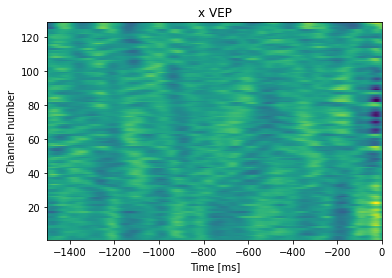

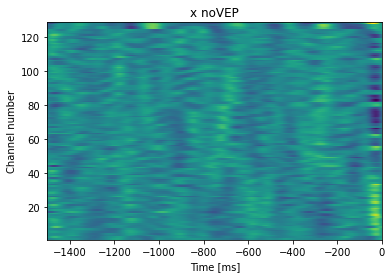

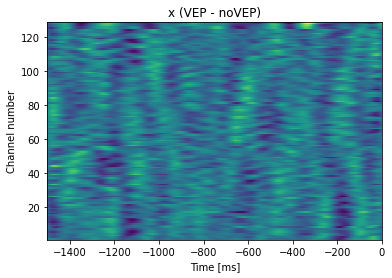

In [47]:
"""
    Explore data set
"""

x_train_norm = normalize(x_train_o)

plot_heatmaps(x_train_norm, y_train, 1, 1)

(426, 75, 32)


c:\Users\vegardkb\Miniconda3\envs\bci\lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


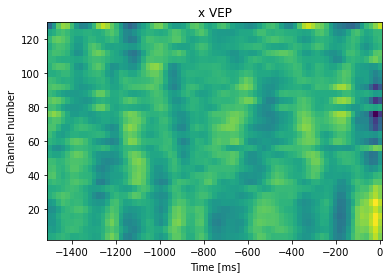

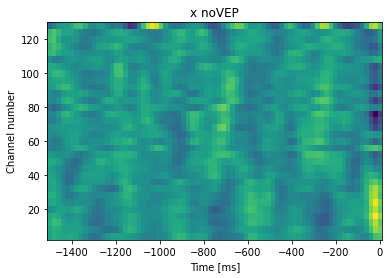

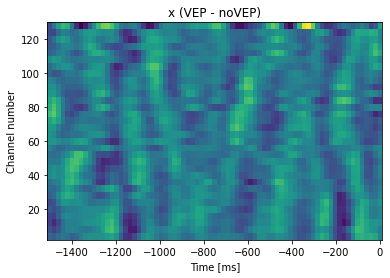

In [48]:
from skimage.measure import block_reduce

n_t = 10
n_ch = 4
x_train_ds = block_reduce(x_train_norm, block_size=(1,n_t,n_ch), func=np.nanmean)
print(x_train_ds.shape)

plot_heatmaps(x_train_ds, y_train, n_t, n_ch)

In [49]:
x_train = block_reduce(normalize(x_train_o), block_size=(1,n_t,n_ch), func=np.nanmean)
x_val = block_reduce(normalize(x_val_o), block_size=(1,n_t,n_ch), func=np.nanmean)
x_test = block_reduce(normalize(x_test_o), block_size=(1,n_t,n_ch), func=np.nanmean)


C:\Users\vegardkb\AppData\Local\Temp\ipykernel_11340\2430337299.py:2: RuntimeWarning: Mean of empty slice
  x_mu = np.nanmean(x, axis=1)


In [50]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (x_train.shape[1], x_train.shape[2], 1)
print(input_shape)

x_train[np.isnan(x_train)] = 0
x_val[np.isnan(x_val)] = 0
x_test[np.isnan(x_test)] = 0

print(np.any(np.isnan(x_train)))

(75, 32, 1)
False


In [51]:
reconstructed_model = keras.models.load_model("CNNmodels/model_cpcp0_old_best_0638loss_62acc.h5")
reconstructed_model.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 75, 32, 1)]       0         
                                                                 
 conv2d_103 (Conv2D)         (None, 75, 32, 4)         40        
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 37, 16, 4)        0         
 g2D)                                                            
                                                                 
 dropout_117 (Dropout)       (None, 37, 16, 4)         0         
                                                                 
 conv2d_104 (Conv2D)         (None, 33, 12, 8)         808       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 16, 6, 8)         0         
 g2D)                                                     

In [52]:
"""
    Making smallest possible network that fits well
"""

inputs = layers.Input(shape=input_shape)

x = layers.Conv2D(4, 3, strides=1, padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D((3,3), strides=3)(x)

x = layers.Flatten()(x)

output = layers.Dense(1, activation="sigmoid", name="clf_output")(x)

tiny_net = keras.Model(inputs=inputs, outputs=output)

tiny_net.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 75, 32, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 75, 32, 4)         40        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 10, 4)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1000)              0         
                                                                 
 clf_output (Dense)          (None, 1)                 1001      
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________

In [53]:
"""
    Conv-Pool-Conv-Pool (LeNet-5 inspired)
"""
dropout_rate = 0.45

inputs = layers.Input(shape=input_shape)

x = layers.Conv2D(4, 3, strides=1, padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D((2,2), strides=2)(x)

x = layers.Dropout(dropout_rate)(x)

x = layers.Conv2D(8, 5, padding="valid", activation="relu")(x)
x = layers.MaxPooling2D((2,2), strides=2)(x)

x = layers.Dropout(dropout_rate)(x)

x = layers.Flatten()(x)

x = layers.Dropout(dropout_rate)(x)

output = layers.Dense(1, activation="sigmoid", name="clf_output")(x)

cpcp0 = keras.Model(inputs=inputs, outputs=output)

cpcp0.summary()



Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 75, 32, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 32, 4)         40        
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 16, 4)        0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 37, 16, 4)         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 33, 12, 8)         808       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 6, 8)         0         
 g2D)                                                      

In [54]:
"""
    Conv-Conv-Pool-Conv-Conv-Pool (vgg-like)
"""
dropout_rate = 0.5

inputs = layers.Input(shape=input_shape)

x = layers.Conv2D(8, 3, strides=1, padding="same", activation="relu")(inputs)
x = layers.Dropout(dropout_rate)(x)
x = layers.Conv2D(8, 3, strides=1, padding="same", activation="relu")(x)
x = layers.Dropout(dropout_rate)(x)
x = layers.MaxPooling2D((2,2), strides=2)(x)

x = layers.Dropout(dropout_rate)(x)

x = layers.Conv2D(16, 3, strides=1, padding="valid", activation="relu")(x)
x = layers.Dropout(dropout_rate)(x)
x = layers.Conv2D(16, 3, strides=1, padding="valid", activation="relu")(x)
x = layers.Dropout(dropout_rate)(x)
x = layers.MaxPooling2D((2,2), strides=2)(x)

x = layers.Dropout(dropout_rate)(x)

x = layers.Flatten()(x)

output = layers.Dense(1, activation="sigmoid", name="clf_output")(x)

cpcp1 = keras.Model(inputs=inputs, outputs=output)

cpcp1.summary()



Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 75, 32, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 32, 8)         80        
                                                                 
 dropout_24 (Dropout)        (None, 75, 32, 8)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 32, 8)         584       
                                                                 
 dropout_25 (Dropout)        (None, 75, 32, 8)         0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 16, 8)        0         
 g2D)                                                            
                                                           

In [55]:
n_samples = y_train.shape[0]
w_clf = np.ones(n_samples)
w_reg = np.zeros(n_samples)
w_reg[y_train == 1] = 1

ops = {
    "optimizer": keras.optimizers.Adam(),
    "losses": {"clf_output": keras.losses.BinaryCrossentropy()},
    "loss_weights": {"clf_output": 1.0},
    "metrics": {
        "clf_output": [
            keras.metrics.BinaryAccuracy(),
            keras.metrics.PrecisionAtRecall(recall=0.8),
        ]
    },
    "y": {"clf_output": y_train},
    "y_val": {"clf_output": y_val,},
    "sample_weight": {"clf_output": w_clf},
}

model_dict = {
    "cpcp0": cpcp0,
    "cpcp1": cpcp1,
    "tiny_net": tiny_net
}

In [56]:
n_epochs = 300

model_name = "cpcp0"
model = model_dict[model_name]

model.compile(
    optimizer = ops["optimizer"],
    loss = ops["losses"],
    loss_weights = ops["loss_weights"],
    metrics = ops["metrics"]
)


checkpoint_filepath = f"CNNmodels/model_{model_name}_{age}_best.h5"
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

early_stopping_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=100, verbose=2, mode='auto',
    baseline=None, restore_best_weights=True)



history = model.fit(
    x = x_train,
    y = ops["y"],
    epochs = n_epochs,
    validation_data = (
        x_val, 
        ops["y_val"]
    ),
    callbacks = [
        model_checkpoint_callback,
        early_stopping_callback,
    ],
    sample_weight = ops["sample_weight"]
)

Epoch 1/300
14/14 [==============================] - 1s 37ms/step - loss: 0.9157 - binary_accuracy: 0.5141 - precision_at_recall_3: 0.4678 - val_loss: 0.6864 - val_binary_accuracy: 0.5597 - val_precision_at_recall_3: 0.5885
Epoch 2/300
14/14 [==============================] - 0s 20ms/step - loss: 0.8411 - binary_accuracy: 0.4577 - precision_at_recall_3: 0.4809 - val_loss: 0.6858 - val_binary_accuracy: 0.5597 - val_precision_at_recall_3: 0.5952
Epoch 3/300
14/14 [==============================] - 0s 18ms/step - loss: 0.7309 - binary_accuracy: 0.5704 - precision_at_recall_3: 0.4751 - val_loss: 0.6930 - val_binary_accuracy: 0.5185 - val_precision_at_recall_3: 0.5981
Epoch 4/300
14/14 [==============================] - 0s 19ms/step - loss: 0.7249 - binary_accuracy: 0.5235 - precision_at_recall_3: 0.4744 - val_loss: 0.6949 - val_binary_accuracy: 0.5021 - val_precision_at_recall_3: 0.5896
Epoch 5/300
14/14 [==============================] - 0s 19ms/step - loss: 0.7123 - binary_accuracy: 0.50

In [57]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'precision_at_recall_3', 'val_loss', 'val_binary_accuracy', 'val_precision_at_recall_3'])


min val_loss = 0.6805211901664734


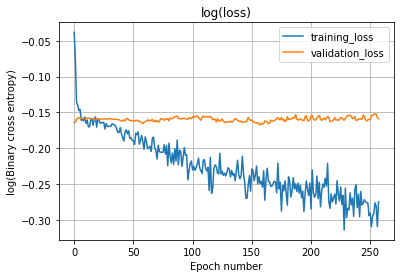

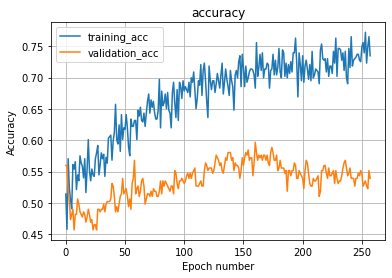

In [58]:
plt.figure()
plt.plot(np.log10(history.history['loss']), label="training_loss")
plt.plot(np.log10(history.history['val_loss']), label="validation_loss")
plt.title("log(loss)")
plt.ylabel("log(Binary cross entropy)")
plt.xlabel("Epoch number")
plt.grid()
plt.legend()

plt.figure()
plt.plot(history.history['binary_accuracy'], label="training_acc")
plt.plot(history.history['val_binary_accuracy'], label="validation_acc")
plt.title("accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number")
plt.grid()
plt.legend()

""" plt.figure()
plt.plot(history.history['reg_output_mean_absolute_error'], label="training_mae")
plt.plot(history.history['val_reg_output_mean_absolute_error'], label="validation_mae")
plt.title("MAE")
plt.ylabel("MAE")
plt.xlabel("Epoch number")
plt.grid()
plt.legend() """

print(f"min val_loss = {np.amin(history.history['val_loss'])}")

In [59]:
"""
    Validation set
"""

pred = model.predict(x_val)
print(pred.shape)
y_pred = pred[:,0]
t_pred = pred[:,0]
y_true = y_val

thr = 0.5

y_pred_b = y_pred >= thr
acc = np.sum(y_pred_b == y_true) / y_pred_b.shape[0]
print(f"Accuracy (validation set): {np.round(acc*100, 1)}")

data = np.stack([y_pred[0:20], y_true[0:20]]).T
print(tabulate(data, headers=["y_pred", "y_true"]))

8/8 [==============================] - 0s 6ms/step
(243, 1)
Accuracy (validation set): 57.2
  y_pred    y_true
--------  --------
0.479738         1
0.508666         1
0.474975         1
0.444859         1
0.507477         1
0.494053         1
0.590534         1
0.458053         1
0.506711         1
0.573654         0
0.446151         1
0.468815         0
0.531277         0
0.382339         0
0.34931          1
0.487127         0
0.432749         0
0.373355         0
0.551849         1
0.266114         1


Violin plot of predicted probalities for each target!

(140,)
(103,)


Text(0.5, 1.0, 'Violin plots Prob(VEP) validation set')

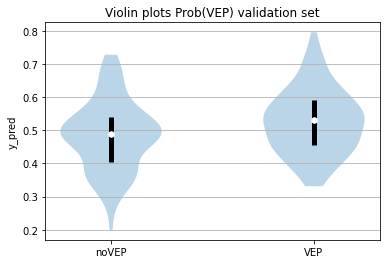

In [60]:
"""
    Examine predicted probabilities
"""
y_pred_pos = y_pred[y_true==1]
y_pred_neg = y_pred[y_true==0]

print(y_pred_pos.shape)
print(y_pred_neg.shape)
n_neg = y_pred_neg.shape[0]
n_pos = y_pred_pos.shape[0]
if n_neg > n_pos:
    y_pred_neg = y_pred_neg[(n_neg - n_pos):]

else:
    y_pred_pos = y_pred_pos[(n_pos - n_neg):]

D_y_pred = [y_pred_neg, y_pred_pos]

quartile1, medians, quartile3 = np.percentile(D_y_pred, [25, 50, 75], axis=1)

inds = np.arange(1, len(medians) + 1)

inds = np.arange(1, len(medians) + 1)
plt.figure()
plt.violinplot(D_y_pred, showextrema=False)
plt.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.grid(axis="y")

ticks = [1, 2]
labels = ["noVEP", "VEP"]
plt.xticks(ticks, labels)
plt.ylabel("y_pred")
plt.title(f"Violin plots Prob(VEP) validation set")

In [61]:
"""
    Test set
"""

y_pred = model.predict(x_test)[:,0]
y_true = y_test

y_pred_b = y_pred >= thr
acc = np.sum(y_pred_b == y_true) / y_pred_b.shape[0]
print(f"Accuracy (Test set): {np.round(acc*100, 1)}")

data = np.stack([y_pred[0:20], y_true[0:20]]).T
print(tabulate(data, headers=["y_pred", "y_true"]))

7/7 [==============================] - 0s 6ms/step
Accuracy (Test set): 64.7
  y_pred    y_true
--------  --------
0.39408          0
0.535997         1
0.672267         1
0.470718         0
0.334293         1
0.440008         0
0.73093          1
0.458119         1
0.572995         1
0.412234         0
0.657207         1
0.464526         0
0.351585         0
0.597033         1
0.535229         0
0.403413         0
0.422108         0
0.452626         0
0.526936         0
0.422043         0


(100,)
(107,)


Text(0.5, 1.0, 'Violin plots Prob(VEP) test set')

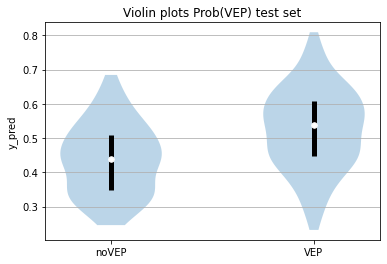

In [62]:
"""
    Examine predicted probabilities
"""
y_pred_pos = y_pred[y_true==1]
y_pred_neg = y_pred[y_true==0]

print(y_pred_pos.shape)
print(y_pred_neg.shape)
n_neg = y_pred_neg.shape[0]
n_pos = y_pred_pos.shape[0]
if n_neg > n_pos:
    y_pred_neg = y_pred_neg[(n_neg - n_pos):]

else:
    y_pred_pos = y_pred_pos[(n_pos - n_neg):]

D_y_pred = [y_pred_neg, y_pred_pos]

quartile1, medians, quartile3 = np.percentile(D_y_pred, [25, 50, 75], axis=1)

inds = np.arange(1, len(medians) + 1)

inds = np.arange(1, len(medians) + 1)
plt.figure()
plt.violinplot(D_y_pred, showextrema=False)
plt.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.grid(axis="y")

ticks = [1, 2]
labels = ["noVEP", "VEP"]
plt.xticks(ticks, labels)
plt.ylabel("y_pred")
plt.title(f"Violin plots Prob(VEP) test set")